In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
dfCartoes = pd.read_csv('../csv/campeonato-brasileiro-cartoes.csv')
dfEst = pd.read_csv('../csv/campeonato-brasileiro-estatisticas-full.csv')
dfFull = pd.read_csv('../csv/campeonato-brasileiro-full.csv')
dfGols = pd.read_csv('../csv/campeonato-brasileiro-gols.csv')

In [4]:
dfCartoes

,partida_id,rodata,clube,cartao,atleta,num_camisa,posicao,minuto
0,4607,1,Figueirense,Amarelo,Paulo Roberto da Silva,28.0,NaN,66
1,4607,1,Figueirense,Amarelo,Thiago Heleno,4.0,Zagueiro,44
2,4608,1,Internacional,Amarelo,Andrés D'Alessandro,10.0,Meio-campo,72
3,4608,1,Vitoria,Amarelo,Marcelo Machado dos Santos,29.0,NaN,86
4,4608,1,Vitoria,Amarelo,Mansur,NaN,Zagueiro,10
...,...,...,...,...,...,...,...,...
20948,8785,38,Corinthians,Amarelo,André Carrillo,19.0,Meio-campo,54
20949,8785,38,Corinthians,Vermelho,José Andrés Martínez,70.0,Meio-campo,79
20950,8785,38,Gremio,Amarelo,Reinaldo Manoel da Silva,6.0,Zagueiro,25
20951,8785,38,Corinthians,Amarelo,Hugo Souza,1.0,Goleiro,64


In [ ]:
dfEst

,partida_id,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,1,1,Vasco,0,0,NaN,0,NaN,0,0,0,0,0
1,1,1,Guarani,0,0,NaN,0,NaN,0,0,0,0,0
2,2,1,Athletico-PR,0,0,NaN,0,NaN,0,0,0,0,0
3,2,1,Gremio,0,0,NaN,0,NaN,0,0,0,0,0
4,3,1,Flamengo,0,0,NaN,0,NaN,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17565,8776,38,Fortaleza,0,0,NaN,0,NaN,0,0,0,0,0
17566,8780,38,Criciuma,0,0,NaN,0,NaN,0,0,0,0,0
17567,8780,38,Bragantino,0,0,NaN,0,NaN,0,0,0,0,0
17568,8785,38,Gremio,0,0,NaN,0,NaN,0,0,0,0,0


In [8]:
dfFull

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/03/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/03/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/03/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR
3,4,1,30/03/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA
4,5,1,30/03/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8780,8783,38,08/12/2024,16:04,Cuiaba,Vasco,4-3-3,4-3-2-1,B. Franco,F. Loureiro,Vasco,Arena Pantanal,1,2,MT,RJ
8781,8784,38,08/12/2024,16:04,Palmeiras,Fluminense,4-2-3-1,4-2-3-1,A. Moreira Ferreira,L. Venker de Menezes,Fluminense,Allianz Parque,0,1,SP,RJ
8782,8776,38,08/12/2024,16:05,Fortaleza,Internacional,4-2-3-1,4-1-2-1-2,J. Vojvoda,R. Machado Marques,Fortaleza,Arena Castelão,3,0,CE,RS
8783,8780,38,08/12/2024,16:05,Bragantino,Criciuma,4-2-3-1,4-1-2-1-2,F. Seabra,C. Tencati,Bragantino,Nabizão,5,1,SP,SC


In [9]:
dfGols

,partida_id,rodata,clube,atleta,minuto,tipo_de_gol
0,4607,1,Fluminense,Rafael Sóbis,31,NaN
1,4607,1,Fluminense,Nirley da Silva Fonseca,59,Gol Contra
2,4607,1,Fluminense,Fred,45,Penalty
3,4608,1,Internacional,Charles Aránguiz,6,NaN
4,4612,1,Cruzeiro,Nílton Ferreira Júnior,63,NaN
...,...,...,...,...,...,...
9856,8780,38,Bragantino,Vinicinho,30,NaN
9857,8780,38,Criciuma,Rodrigo Fagundes de Freitas,39,NaN
9858,8785,38,Corinthians,Charles Rigon Matos,88,NaN
9859,8785,38,Corinthians,Yuri Alberto,45+1,Penalty


In [36]:
nGols = dfGols['atleta'].count()
nGols

9861

In [37]:
clubesSobisMarcou = dfGols.loc[dfGols['atleta'] == 'Rafael Sóbis', 'clube'].unique()
print(clubesSobisMarcou)

['Fluminense' 'Cruzeiro' 'Internacional']


In [45]:
gols_sobis = dfGols[dfGols["atleta"] == "Rafael Sóbis"]
gols_sobis

,partida_id,rodata,clube,atleta,minuto,tipo_de_gol
0,4607,1,Fluminense,Rafael Sóbis,31,NaN
16,4618,2,Fluminense,Rafael Sóbis,45,NaN
114,4662,6,Fluminense,Rafael Sóbis,76,NaN
2204,5544,18,Cruzeiro,Rafael Sóbis,14,NaN
2206,5544,18,Cruzeiro,Rafael Sóbis,41,NaN
2208,5544,18,Cruzeiro,Rafael Sóbis,53,NaN
2569,5701,34,Cruzeiro,Rafael Sóbis,26,NaN
2864,5825,8,Cruzeiro,Rafael Sóbis,48,NaN
2897,5841,10,Cruzeiro,Rafael Sóbis,65,NaN
3244,5991,25,Cruzeiro,Rafael Sóbis,22,NaN


C:\Users\rapha\AppData\Local\Temp\ipykernel_11224\3073735054.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artilheiros.index, y=artilheiros.values, palette='Oranges')


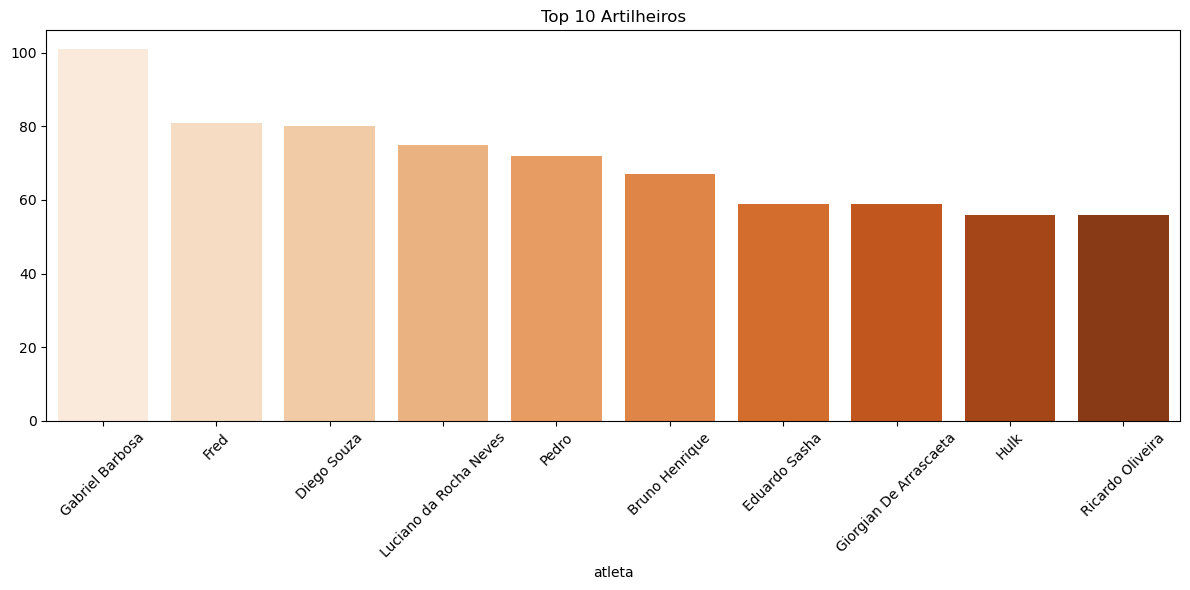

In [48]:
artilheiros = dfGols['atleta'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=artilheiros.index, y=artilheiros.values, palette='Oranges')
plt.title("Top 10 Artilheiros")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\rapha\AppData\Local\Temp\ipykernel_11224\3236206528.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vermelhos.index, y=vermelhos.values, palette='Reds')


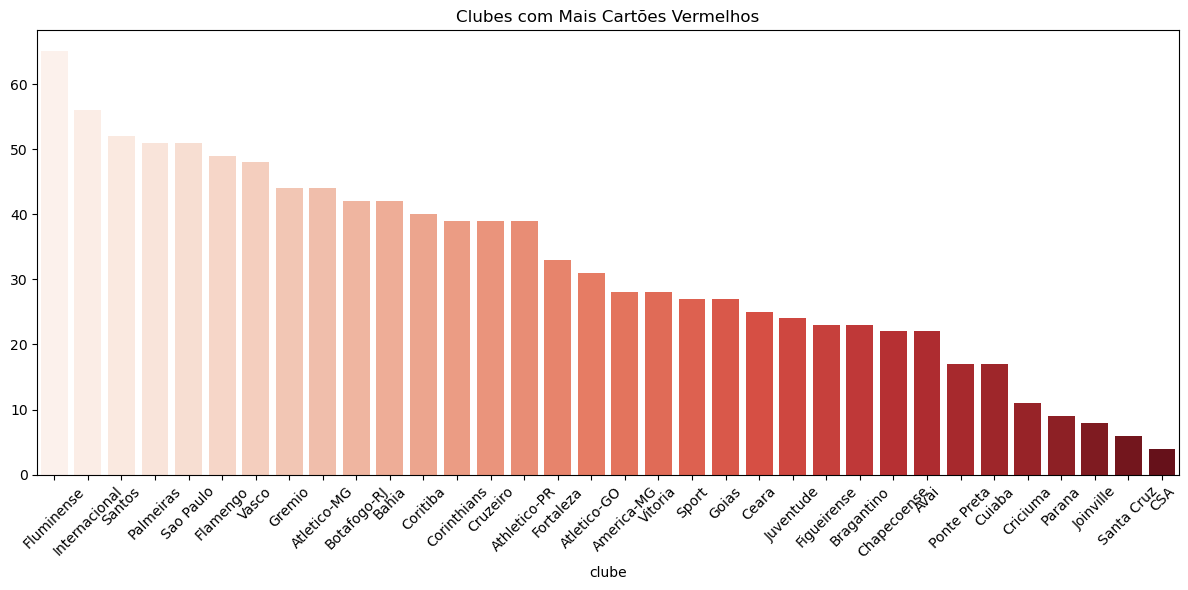

In [61]:
vermelhos = dfCartoes[dfCartoes['cartao'] == 'Vermelho']['clube'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=vermelhos.index, y=vermelhos.values, palette='Reds')
plt.title("Clubes com Mais Cartões Vermelhos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [63]:
dfGols

,partida_id,rodata,clube,atleta,minuto,tipo_de_gol
0,4607,1,Fluminense,Rafael Sóbis,31,NaN
1,4607,1,Fluminense,Nirley da Silva Fonseca,59,Gol Contra
2,4607,1,Fluminense,Fred,45,Penalty
3,4608,1,Internacional,Charles Aránguiz,6,NaN
4,4612,1,Cruzeiro,Nílton Ferreira Júnior,63,NaN
...,...,...,...,...,...,...
9856,8780,38,Bragantino,Vinicinho,30,NaN
9857,8780,38,Criciuma,Rodrigo Fagundes de Freitas,39,NaN
9858,8785,38,Corinthians,Charles Rigon Matos,88,NaN
9859,8785,38,Corinthians,Yuri Alberto,45+1,Penalty


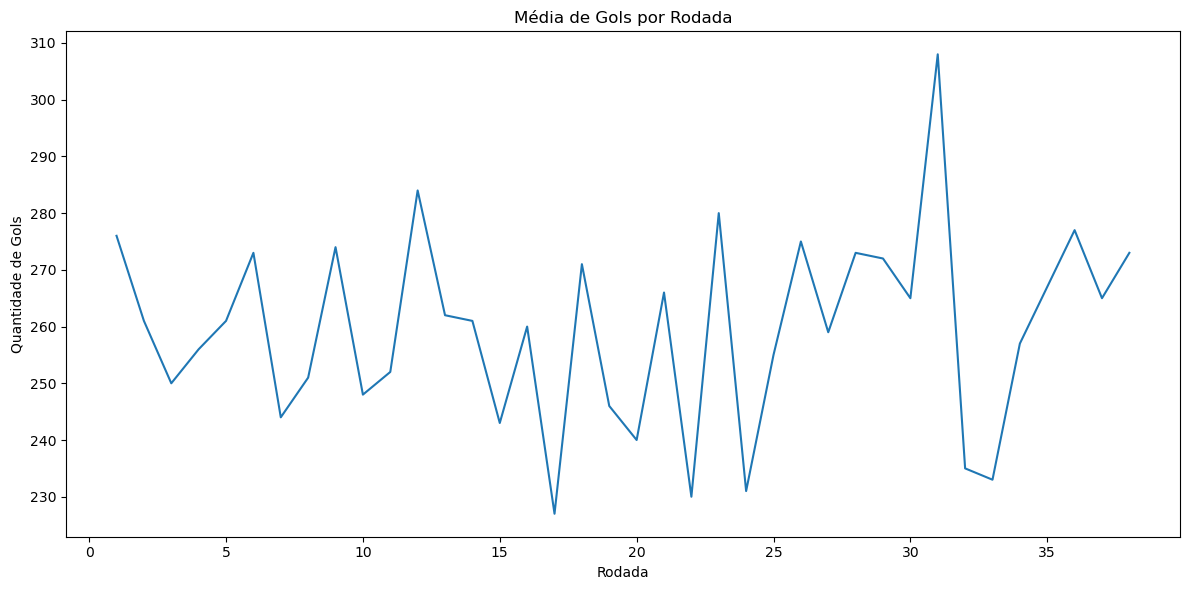

In [64]:
media_gols_rodada = dfGols.groupby('rodata').size()
plt.figure(figsize=(12,6))
sns.lineplot(x=media_gols_rodada.index, y=media_gols_rodada.values)
plt.title("Média de Gols por Rodada")
plt.xlabel("Rodada")
plt.ylabel("Quantidade de Gols")
plt.tight_layout()
plt.show()


C:\Users\rapha\AppData\Local\Temp\ipykernel_11224\104508987.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gols_clubes.index, y=gols_clubes.values, palette='Blues_d')


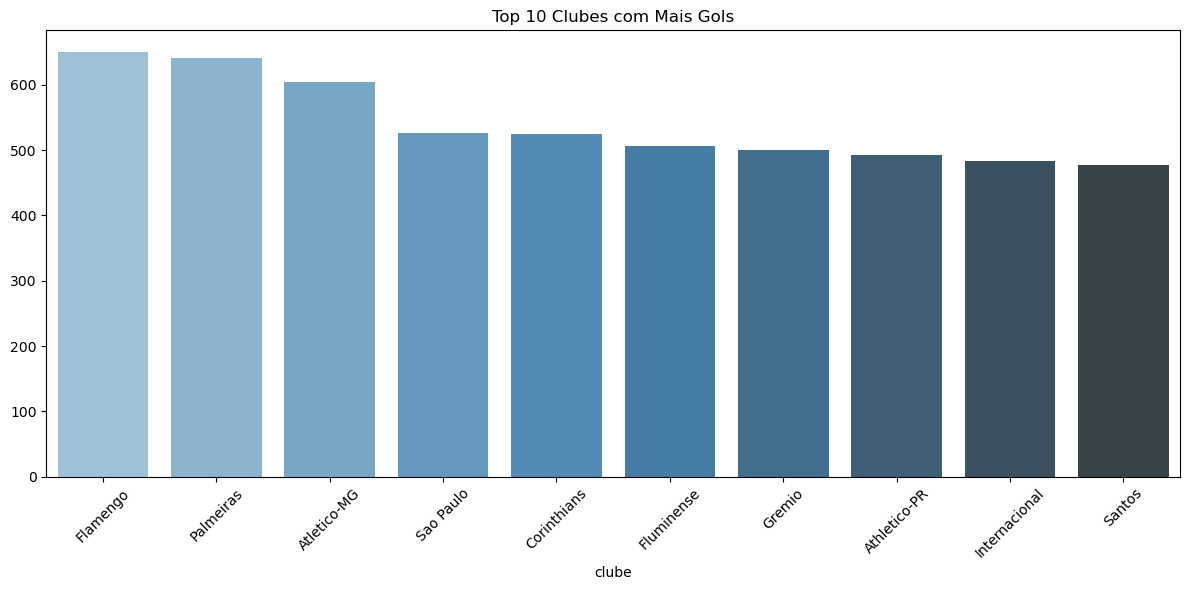

In [66]:
gols_clubes = dfGols['clube'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=gols_clubes.index, y=gols_clubes.values, palette='Blues_d')
plt.title("Top 10 Clubes com Mais Gols")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [69]:
dfEst

,partida_id,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,1,1,Vasco,0,0,NaN,0,NaN,0,0,0,0,0
1,1,1,Guarani,0,0,NaN,0,NaN,0,0,0,0,0
2,2,1,Athletico-PR,0,0,NaN,0,NaN,0,0,0,0,0
3,2,1,Gremio,0,0,NaN,0,NaN,0,0,0,0,0
4,3,1,Flamengo,0,0,NaN,0,NaN,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17565,8776,38,Fortaleza,0,0,NaN,0,NaN,0,0,0,0,0
17566,8780,38,Criciuma,0,0,NaN,0,NaN,0,0,0,0,0
17567,8780,38,Bragantino,0,0,NaN,0,NaN,0,0,0,0,0
17568,8785,38,Gremio,0,0,NaN,0,NaN,0,0,0,0,0


In [80]:
dfFull['mandante'].unique()

array(['Guarani', 'Athletico-PR', 'Flamengo', 'Goias', 'Internacional',
       'Criciuma', 'Juventude', 'Fortaleza', 'Cruzeiro', 'Vitoria',
       'Santos', 'Corinthians', 'Fluminense', 'Atletico-MG', 'Coritiba',
       'Gremio', 'Bahia', 'Figueirense', 'Paysandu', 'Ponte Preta',
       'Parana', 'Sao Caetano', 'Sao Paulo', 'Vasco', 'Botafogo-RJ',
       'Palmeiras', 'Brasiliense', 'Santa Cruz', 'America-RN', 'Sport',
       'Nautico', 'Ipatinga', 'Portuguesa', 'Avai', 'Santo Andre',
       'Barueri', 'Atletico-GO', 'Ceara', 'Gremio Prudente', 'America-MG',
       'Chapecoense', 'Joinville', 'CSA', 'Bragantino', 'Cuiaba'],
      dtype=object)

C:\Users\rapha\AppData\Local\Temp\ipykernel_11224\2074062840.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_classico['Vencedor Final'] = df_classico['vencedor'].replace('-', 'Empate')
C:\Users\rapha\AppData\Local\Temp\ipykernel_11224\2074062840.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=resultados.index, y=resultados.values, palette='coolwarm')


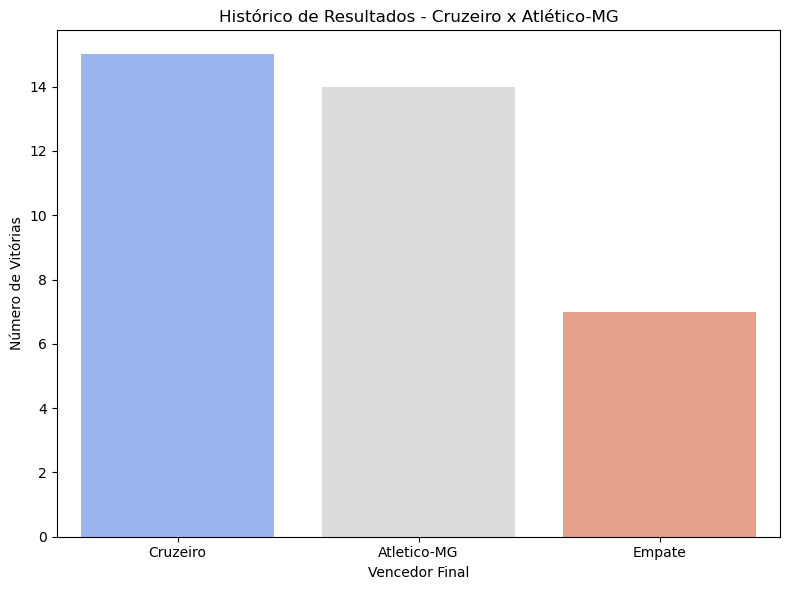

C:\Users\rapha\AppData\Local\Temp\ipykernel_11224\2074062840.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Cruzeiro', 'Atletico-MG'], y=[gols_cruzeiro, gols_atletico], palette='Set2')


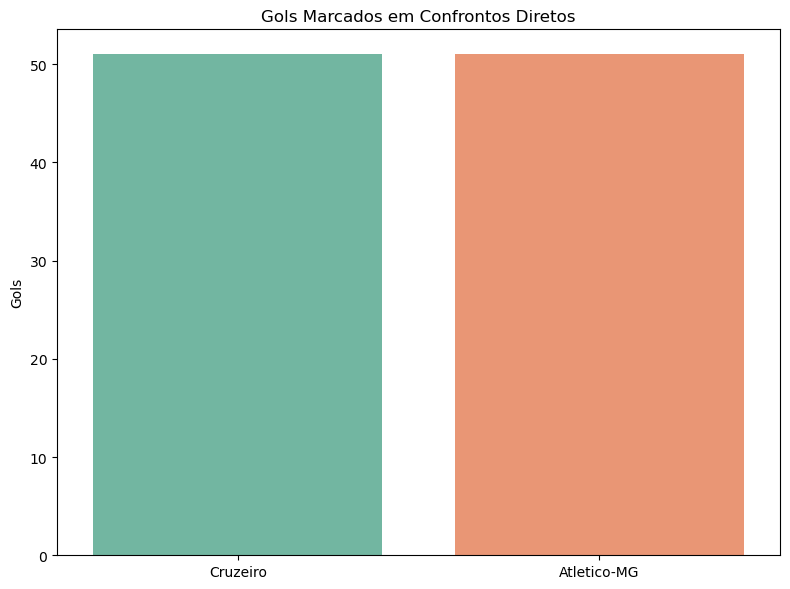

In [81]:
times_classico = ['Cruzeiro', 'Atletico-MG']
df_classico = dfFull[(dfFull['mandante'].isin(times_classico)) & (dfFull['visitante'].isin(times_classico))]
df_classico['Vencedor Final'] = df_classico['vencedor'].replace('-', 'Empate')

# Resultado do confronto direto
resultados = df_classico['Vencedor Final'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=resultados.index, y=resultados.values, palette='coolwarm')
plt.title("Histórico de Resultados - Cruzeiro x Atlético-MG")
plt.ylabel("Número de Vitórias")
plt.tight_layout()
plt.show()

# Gols marcados por cada time no confronto direto
gols_cruzeiro = df_classico['mandante_Placar'][(df_classico['mandante'] == 'Cruzeiro')].sum() + df_classico['visitante_Placar'][(df_classico['visitante'] == 'Cruzeiro')].sum()
gols_atletico = df_classico['mandante_Placar'][(df_classico['mandante'] == 'Atletico-MG')].sum() + df_classico['visitante_Placar'][(df_classico['visitante'] == 'Atletico-MG')].sum()

plt.figure(figsize=(8,6))
sns.barplot(x=['Cruzeiro', 'Atletico-MG'], y=[gols_cruzeiro, gols_atletico], palette='Set2')
plt.title("Gols Marcados em Confrontos Diretos")
plt.ylabel("Gols")
plt.tight_layout()
plt.show()